In [17]:
from textblob import TextBlob
from googletrans import Translator
from deep_translator import GoogleTranslator
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def translate(text):
    translator = GoogleTranslator(source='auto', target='en')
    return translator.translate(text)

def analyze_sent(text):
    blob = TextBlob(translated_text)
    return blob.sentiment


text = "Este es un ejemplo bonito."
translated_text = translate(text)
print(translated_text)
sentiment = analyze_sent(translated_text)
print(sentiment)

This is a nice example.
Sentiment(polarity=0.6, subjectivity=1.0)


In [11]:
df = pd.read_csv('../results/all_amazon_reviews.csv')

def translate_and_analyze_sentiment(text):
    try:
        # Traducir del español al inglés
        translator = GoogleTranslator(source='auto', target='en')
        translated_text = translator.translate(text)

        # Análisis de sentimiento
        blob = TextBlob(translated_text)
        return blob.sentiment
    except Exception as e:
        # Manejo de excepciones
        print(f"Error al procesar el texto: {e}")
        return None

In [12]:
# Aplicar la función a la columna 'review_text' de tu DataFrame
df['sentiment'] = df['review_text'].apply(translate_and_analyze_sentiment)

# Mostrar las primeras filas para verificar
print(df.head())

Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al procesar el texto: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error al

In [15]:
df_filtered = df[df['sentiment'].notna()]

df_filtered['polarity'] = df_filtered['sentiment'].apply(lambda x: x[0] if x is not None else None)
df_filtered['subjectivity'] = df_filtered['sentiment'].apply(lambda x: x[1] if x is not None else None)

# Mostrar las primeras filas para verificar
print(df_filtered.head())

         asin         star_rating                                  title   
0  B0CJNQBKX9  5.0 de 5 estrellas  EXCELENTE NITIDEZ Y CALIDAD DE IMAGEN  \
1  B0CJNQBKX9  5.0 de 5 estrellas                     Excelente producto   
2  B0C47PZ6HR  4.0 de 5 estrellas                         Llegó sin base   
3  B0C47PZ6HR  4.0 de 5 estrellas                                  BUENA   
4  B0C47PZ6HR  5.0 de 5 estrellas                          Bien producto   

                                         review_text   
0  Me fascino por la versatilidad de sus contrast...  \
1  Excelente calidad de imagenMe gustó mucho la m...   
2         La pantalla llegó sin el soporte para mesa   
3  Todo muy bien, en su publicacion aparecen unos...   
4  Buen producto pero no viene los audífonos la v...   

                     sentiment  polarity  subjectivity  
0                (0.515, 0.61)     0.515         0.610  
1  (0.602, 0.7560000000000001)     0.602         0.756  
2                   (0.0, 0.0)     

/var/folders/7s/8gykf97x5cn2tcc2nnlh93t40000gn/T/ipykernel_38533/2922260121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['polarity'] = df_filtered['sentiment'].apply(lambda x: x[0] if x is not None else None)
/var/folders/7s/8gykf97x5cn2tcc2nnlh93t40000gn/T/ipykernel_38533/2922260121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['subjectivity'] = df_filtered['sentiment'].apply(lambda x: x[1] if x is not None else None)


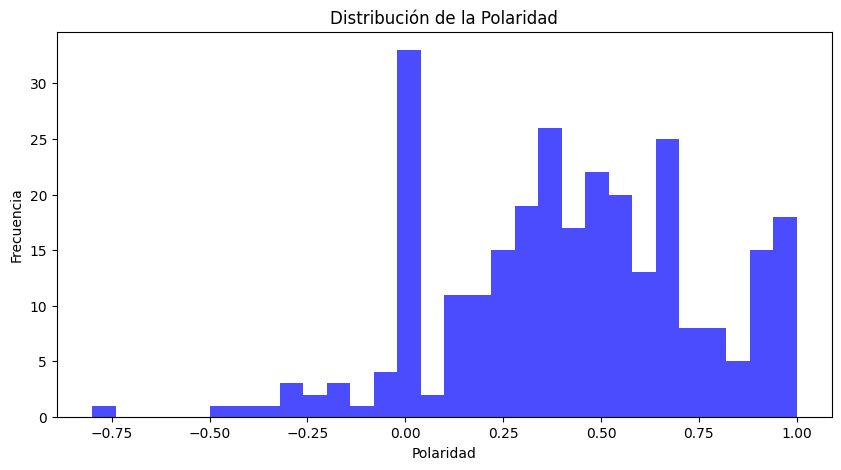

In [19]:
# Histograma de Polaridad
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['polarity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribución de la Polaridad')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

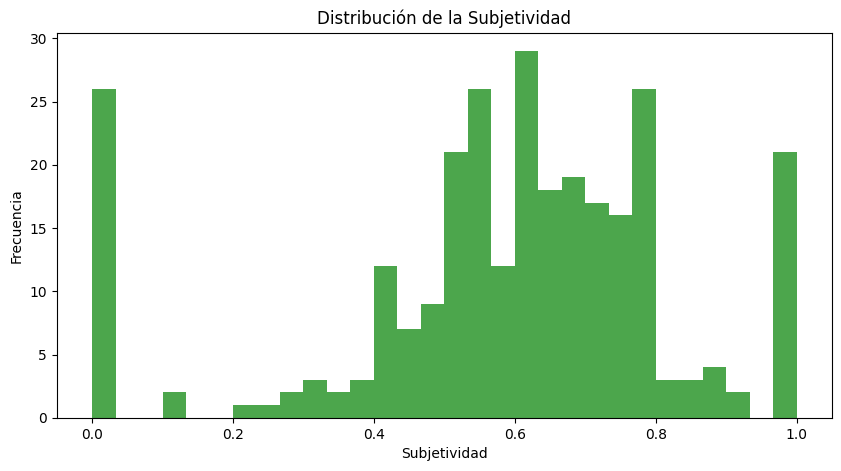

In [21]:
# Histograma de Subjetividad
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['subjectivity'], bins=30, color='green', alpha=0.7)
plt.title('Distribución de la Subjetividad')
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.show()

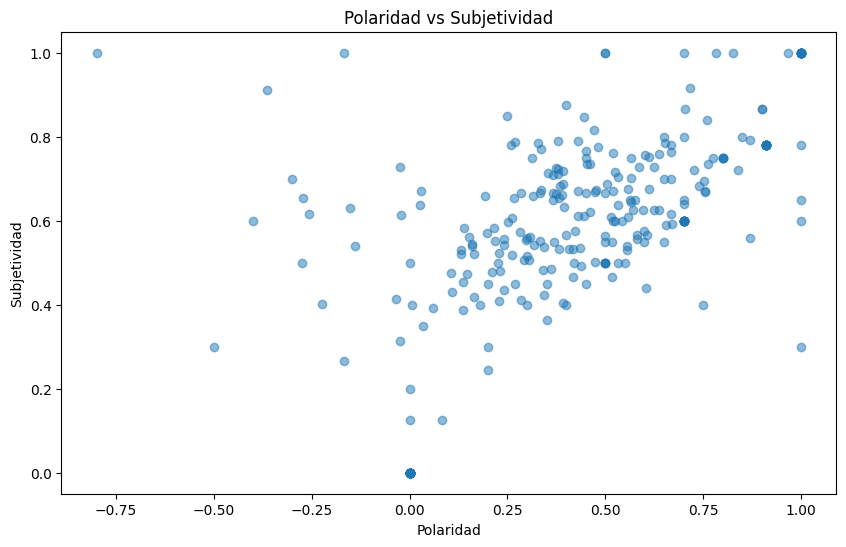

In [25]:
# Diagrama de Dispersión de Polaridad vs Subjetividad
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['polarity'], df_filtered['subjectivity'], alpha=0.5)
plt.title('Polaridad vs Subjetividad')
plt.xlabel('Polaridad')
plt.ylabel('Subjetividad')
plt.show()